# EXPLORATORY DATA ANALYSIS / COURSE 2 / PROJECT

## IMPORTING NECESSARY LIBRARIES

In [1]:
# Importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from scipy import stats
from scipy.stats import skew,kurtosis
import warnings
warnings.filterwarnings(action = 'ignore')


In [2]:
# Installing module for calculations
!pip install haversine

In [4]:
from haversine import haversine

## READING THE DATASET

In [6]:
# Reading the dataset 
data = pd.read_excel('nyc_taxi_trip_duration.xlsx')

## UNDERSTANDING THE DATASET

In [8]:
# Exploring the dataset
# Finding the shape of the dataset
data.shape

(729322, 11)

#### There are 729322 rows and 11 columns in the dataset.

In [9]:
# Viewing the first 5 rows
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


#### The head() gives us an idea how the dataframe looks like. Here we have 10 independant variables and one target variable.
1. 'id' which is the unique identifier of each trip.
2. 'pickup_datetime and dropoff_datetime which gives the date and time of the trip start and end respectively.
3. 'passenger_count' which is the number of passengers for the ride.
4. 'pickup_longitude','pickup_latitude','dropoff_latitude','dropoff_longitude' which are implications of the geographical latitude and longitude at the time of pick up and drop off.
5.'store_and_fwd_flag' where N indicates that the trip record was not stored in the vehicle before forwarding and Y indicates that it was stored.
Here ,our target variable is the trip_duration in seconds.


In [10]:
# Finding the column names
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

#### These are the column names

In [11]:
# Finding the datatype of each columns
data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

#### There is no need to change the datatype of any column as they are of the desired type.

In [12]:
# Checking for null values
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

#### There are no null values in the dataset. So we needn't impute any values.

In [13]:
# Finding unique values in each column
data.nunique()

id                    729322
vendor_id                  2
pickup_datetime       709359
dropoff_datetime      709308
passenger_count            9
pickup_longitude       19729
pickup_latitude        39776
dropoff_longitude      27892
dropoff_latitude       53579
store_and_fwd_flag         2
trip_duration           6296
dtype: int64

#### 1. id is unique for each trip which makes the id = number of rows
#### 2. There are two vendors which makes vendor_id=2
#### 3. There are 9 unique values for passenger_count
#### 4. store_and_fwd_flag has two values Y/N

In [14]:
# Summary for numerical variable
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


#### 1. vendor_id have min=1 and max=2 which makes it clear that we have only two vendors.
#### 2. passenger_count varies from 0 to 9. So, there are possible outliers because 0 passengers and 7/8/9 passengers are not desirable.
#### 3. pickup and dropoff latitudes and longitudes in some rows are misleading.

In [15]:
# Summary of non-numerical variables
data.describe(include = object)

,id,store_and_fwd_flag
count,729322,729322
unique,729322,2
top,id3055402,N
freq,1,725282


#### The id has a frequency 1 which means all the rows have unique values.

## Feature Creation

In [16]:
# Creating features based on month

data['pickup_month']=data['pickup_datetime'].dt.month
data['dropoff_month']=data['dropoff_datetime'].dt.month

In [17]:
# Creating features based on the day of week

data['pickup_day_no']=data['pickup_datetime'].dt.weekday
data['dropoff_day_no']=data['dropoff_datetime'].dt.weekday

In [18]:
# Creating features based on day

data['pickup_day']=data['pickup_datetime'].dt.day_name()
data['dropoff_day']=data['dropoff_datetime'].dt.day_name()

In [19]:
# Creating features based on hour of the day

data['pickup_hour']=data['pickup_datetime'].dt.hour
data['dropoff_hour']=data['dropoff_datetime'].dt.hour


In [20]:
# Let's see how the data looks like
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,dropoff_month,pickup_day_no,dropoff_day_no,pickup_day,dropoff_day,pickup_hour,dropoff_hour
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,2,2,0,0,Monday,Monday,16,16
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,3,3,4,4,Friday,Friday,23,23
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,2,2,6,6,Sunday,Sunday,17,18
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,1,1,1,1,Tuesday,Tuesday,9,10
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,2,2,2,2,Wednesday,Wednesday,6,6


#### Now that we have got the hour at which the trip started and ended, by dividing the day into four parts we can analyse which part of the day is the taxi most used.
#### 1. 6:01am - 12:00pm as Morning
#### 2. 12:01pm - 18:00pm as Afternoon
#### 3. 18:01pm - 21:00pm as Evening
#### 4. 21:01pm - 6:00am as Night

In [21]:
# Defining a function to extract the part of day
def part_of_day (time):
    if time in range (6,12):
        return "Morning"
    elif time in range (12,18):
        return "Afternoon"
    elif time in range (18,21):
        return "Evening"
    else:
        return "Night"

In [24]:
# Creating two new features called pickup_part_of_day and dropoff_part_of_day.

data['pickup_part_of_day']=data['pickup_hour'].apply(part_of_day)
data['dropoff_part_of_day']=data['dropoff_hour'].apply(part_of_day)

In [25]:
# lets c how our data looks like
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_month,dropoff_month,pickup_day_no,dropoff_day_no,pickup_day,dropoff_day,pickup_hour,dropoff_hour,pickup_part_of_day,dropoff_part_of_day
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,...,2,2,0,0,Monday,Monday,16,16,Afternoon,Afternoon
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,...,3,3,4,4,Friday,Friday,23,23,Night,Night
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,...,2,2,6,6,Sunday,Sunday,17,18,Afternoon,Evening
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,...,1,1,1,1,Tuesday,Tuesday,9,10,Morning,Morning
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,...,2,2,2,2,Wednesday,Wednesday,6,6,Morning,Morning


#### Since the trip duration cannot be infererred as directly proportional to the distance between the start and end locations ( some routes have more traffic / speed limit of certain highways etc can be a factor), we need to mathematically calculate the distance between two point based on their geographical locations.

#### We do this using the haversine formula of the haversine module of python. This formula returns the angular distance between two points in kilometers.

In [28]:
# Function to determine the distance between two coordinate
def trip_distance(pickup_latitude,pickup_longitude, dropoff_latitude,dropoff_longitude):
    start_point = (pickup_latitude,pickup_longitude)
    finish_point = (dropoff_latitude,dropoff_longitude)
    
    return haversine(start_point,finish_point)

In [29]:
# Creating a new column in our dataset for distance

data['distance'] = data.apply(lambda x: trip_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude']), axis=1)

In [30]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_month,pickup_day_no,dropoff_day_no,pickup_day,dropoff_day,pickup_hour,dropoff_hour,pickup_part_of_day,dropoff_part_of_day,distance
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,...,2,0,0,Monday,Monday,16,16,Afternoon,Afternoon,1.199074
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,...,3,4,4,Friday,Friday,23,23,Night,Night,4.129117
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,...,2,6,6,Sunday,Sunday,17,18,Afternoon,Evening,7.250763
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,...,1,1,1,Tuesday,Tuesday,9,10,Morning,Morning,2.361101
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,...,2,2,2,Wednesday,Wednesday,6,6,Morning,Morning,4.328540


In [31]:
# Calculating the speed using speed= distance/time. Here distance is in km and time is in seconds.

data['speed'] = data['distance']/(data['trip_duration']/3600)

In [32]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_day_no,dropoff_day_no,pickup_day,dropoff_day,pickup_hour,dropoff_hour,pickup_part_of_day,dropoff_part_of_day,distance,speed
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,...,0,0,Monday,Monday,16,16,Afternoon,Afternoon,1.199074,10.791668
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,...,4,4,Friday,Friday,23,23,Night,Night,4.129117,13.513473
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,...,6,6,Sunday,Sunday,17,18,Afternoon,Evening,7.250763,15.964983
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,...,1,1,Tuesday,Tuesday,9,10,Morning,Morning,2.361101,7.449573
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,...,2,2,Wednesday,Wednesday,6,6,Morning,Morning,4.328540,18.375877


In [33]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_month,dropoff_month,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,distance,speed
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.00000,729322.000000,729322.000000
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02,3.518410,3.518764,3.049081,3.053015,13.611698,13.60616,3.441143,14.421468
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03,1.680661,1.680815,1.954470,1.956866,6.402853,6.48637,4.353138,12.341044
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02,2.000000,2.000000,1.000000,1.000000,9.000000,9.00000,1.232697,9.124323
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02,4.000000,4.000000,3.000000,3.000000,14.000000,14.00000,2.095675,12.796846
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03,5.000000,5.000000,5.000000,5.000000,19.000000,19.00000,3.876486,17.843942
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06,6.000000,7.000000,6.000000,6.000000,23.000000,23.00000,1240.910391,5640.501776


#### The maximum distance and speed indicates clear outliers in our dataset. Now that we have created extra columns for gaining more insights, we can start our analysis.

## UNIVARIATE ANALYSIS

#### 1. trip_duration

<AxesSubplot:title={'center':'Boxplot for Trip_Duration'}, xlabel='trip_duration'>

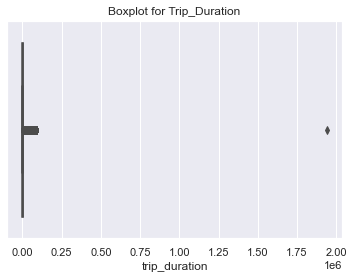

In [35]:
plt.title('Boxplot for Trip_Duration')
sns.boxplot(x = data['trip_duration'])

#### The boxplot indicates a clear outlier which has to be removed from our dataset.

In [36]:
data[data['trip_duration'] == data['trip_duration'].max()]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_day_no,dropoff_day_no,pickup_day,dropoff_day,pickup_hour,dropoff_hour,pickup_part_of_day,dropoff_part_of_day,distance,speed
21813,id1864733,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.78965,40.643559,-73.95681,40.773087,N,...,1,2,Tuesday,Wednesday,0,11,Night,Morning,20.148692,0.037394


In [37]:
data.drop(data[data['trip_duration'] == 1939736].index, inplace = True)

#### This will remove the row containing the trip duration 1939736 from our dataset.

#### 2. vendor_id

<AxesSubplot:xlabel='vendor_id', ylabel='count'>

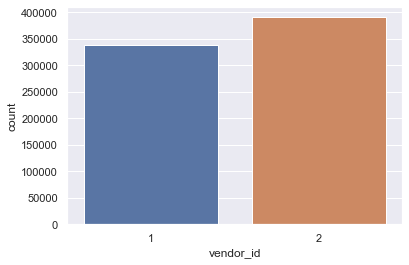

In [38]:
sns.countplot(x='vendor_id', data=data)

#### It is obvious from the plot that vendor 2 has more rides than vendor 1.

#### 3. passenger_count

In [41]:
data.passenger_count.value_counts()

1    517414
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
7         1
9         1
Name: passenger_count, dtype: int64

#### Here 0,7,9 are outliers since these are not desirable values for the number of passengers in a taxi. They have to be removed from the dataset.

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

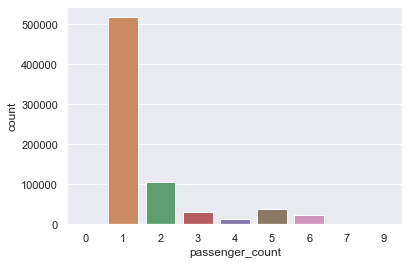

In [42]:
sns.countplot(x='passenger_count',data=data)

In [46]:
# Removing outliers

data=data[data['passenger_count']!=0]
data=data[data['passenger_count']<=6]

In [49]:
data.passenger_count.value_counts()

1    517414
2    105097
5     38926
3     29692
6     24107
4     14050
Name: passenger_count, dtype: int64

#### The passenger now varies from 1 to 6 as we have removed the outliers

#### 4.pickup_day and dropoff_day

<AxesSubplot:xlabel='pickup_day', ylabel='count'>

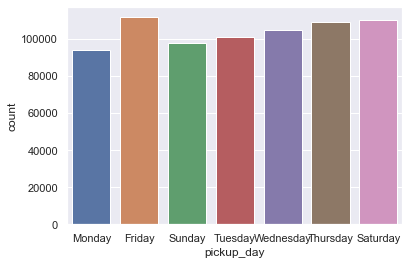

In [50]:
sns.countplot(x = 'pickup_day', data=data)

<AxesSubplot:xlabel='dropoff_day', ylabel='count'>

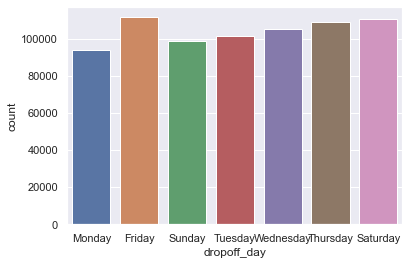

In [51]:
sns.countplot(x = 'dropoff_day', data=data)

#### It is found that taxi is being booked maximum on Fridays followed by Saturday and Thursday. This might be because people tend to travel maximum and settle before Sunday.

#### 5.distance

In [53]:
# Checking the statistics of distance

data['distance'].describe()

count    729286.000000
mean          3.441200
std           4.353082
min           0.000000
25%           1.232762
50%           2.095790
75%           3.876520
max        1240.910391
Name: distance, dtype: float64

In [54]:
data['distance'].value_counts()

0.000000     2893
0.000424       50
0.001273       23
0.000848       20
0.001273       15
             ... 
1.390571        1
5.138574        1
0.866202        1
1.734473        1
12.242627       1
Name: distance, Length: 726179, dtype: int64

#### There are 2893 rows with distance 0km which is not desirable.

In [55]:
# Checking all rows with 0km distance.
data[data['distance']==data['distance'].min()]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_day_no,dropoff_day_no,pickup_day,dropoff_day,pickup_hour,dropoff_hour,pickup_part_of_day,dropoff_part_of_day,distance,speed
263,id3155891,2,2016-06-28 11:21:00,2016-06-28 11:25:00,2,-73.996422,40.298828,-73.996422,40.298828,N,...,1,1,Tuesday,Tuesday,11,11,Morning,Morning,0.0,0.0
327,id0786923,2,2016-03-26 13:34:38,2016-03-26 13:37:17,1,-73.996323,40.753460,-73.996323,40.753460,N,...,5,5,Saturday,Saturday,13,13,Afternoon,Afternoon,0.0,0.0
795,id2323213,2,2016-06-13 16:49:52,2016-06-13 17:04:49,5,-73.967171,40.763500,-73.967171,40.763500,N,...,0,0,Monday,Monday,16,17,Afternoon,Afternoon,0.0,0.0
1176,id3235868,1,2016-02-29 21:39:52,2016-02-29 21:44:08,1,-73.995232,40.744038,-73.995232,40.744038,N,...,0,0,Monday,Monday,21,21,Night,Night,0.0,0.0
1257,id1865738,2,2016-03-13 11:38:36,2016-03-13 12:00:46,2,-73.912781,40.804428,-73.912781,40.804428,N,...,6,6,Sunday,Sunday,11,12,Morning,Afternoon,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728720,id3423342,2,2016-05-05 21:32:43,2016-05-05 21:32:57,2,-73.977898,40.766392,-73.977898,40.766392,N,...,3,3,Thursday,Thursday,21,21,Night,Night,0.0,0.0
728775,id2618105,2,2016-03-13 20:06:40,2016-03-13 20:14:24,1,-73.974258,40.759895,-73.974258,40.759895,N,...,6,6,Sunday,Sunday,20,20,Evening,Evening,0.0,0.0
728838,id1232120,2,2016-05-29 04:04:32,2016-05-29 04:11:33,2,-73.984558,40.750839,-73.984558,40.750839,N,...,6,6,Sunday,Sunday,4,4,Night,Night,0.0,0.0
729025,id3524028,2,2016-04-06 18:03:34,2016-04-06 18:26:23,1,-74.083611,40.632401,-74.083611,40.632401,N,...,2,2,Wednesday,Wednesday,18,18,Evening,Evening,0.0,0.0


#### It can be seen that the store_and_fwd_flag of all these rows are 'N' which implies the records were not properly kept by the driver due to network or other issues.

#### 6. speed

In [56]:
# Checking statistics of speed

data['speed'].describe()

count    729286.000000
mean         14.421917
std          12.341022
min           0.000000
25%           9.124621
50%          12.797117
75%          17.844282
max        5640.501776
Name: speed, dtype: float64

#### Here the maximum speed is 5640km/hr which is clearly an outlier. So, we need to remove it.

In [57]:
data[data['speed']==data['speed'].max()]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_day_no,dropoff_day_no,pickup_day,dropoff_day,pickup_hour,dropoff_hour,pickup_part_of_day,dropoff_part_of_day,distance,speed
244913,id2306955,1,2016-05-07 18:58:53,2016-05-07 19:12:05,1,-72.809669,51.881084,-73.987228,40.750599,N,...,5,5,Saturday,Saturday,18,19,Evening,Evening,1240.910391,5640.501776


#### 7. pickup_hour & dropoff_hour

<AxesSubplot:xlabel='pickup_hour', ylabel='count'>

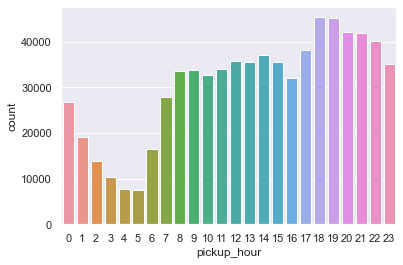

In [66]:
sns.countplot(x="pickup_hour",data=data)

<AxesSubplot:xlabel='dropoff_hour', ylabel='count'>

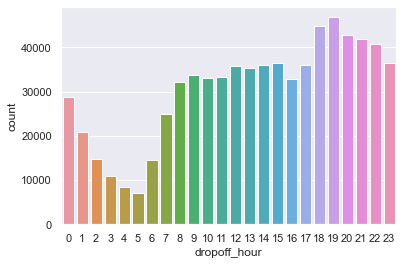

In [67]:
sns.countplot(x="dropoff_hour",data=data)

#### The plot shows that the traffic is maximum at times between 6:00pm and 7:00pm.

#### 8. pickup_part_of_day & dropoff_part_of_day

<AxesSubplot:xlabel='pickup_part_of_day', ylabel='count'>

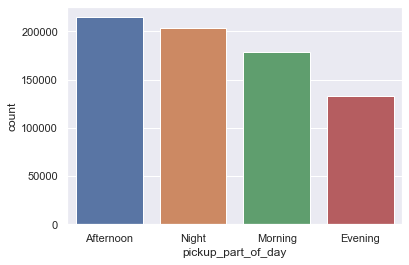

In [68]:
sns.countplot(x="pickup_part_of_day",data=data) 

<AxesSubplot:xlabel='dropoff_part_of_day', ylabel='count'>

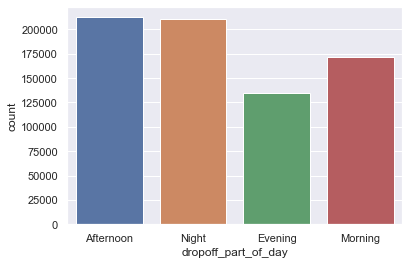

In [69]:
sns.countplot(x="dropoff_part_of_day",data=data)

#### It is seen that evenings are the busiest.

#### 9. pickup_month & dropoff_month

<AxesSubplot:xlabel='pickup_month', ylabel='count'>

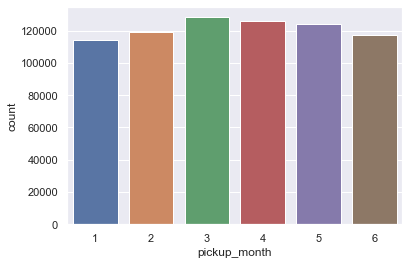

In [70]:
sns.countplot(x="pickup_month",data=data)

<AxesSubplot:xlabel='dropoff_month', ylabel='count'>

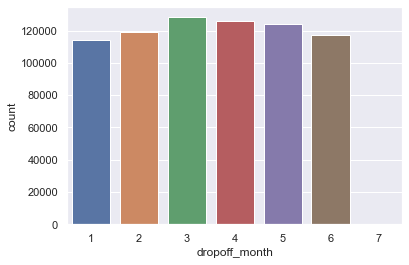

In [71]:
sns.countplot(x="dropoff_month",data=data)

#### There are no inconsistancies since both the pickup_month and dropoff_month seems to be similar.

## BIVARIATE ANALYSIS

#### Here we will find the relationship of our target variable with other variables.

#### 1. vendor_id and trip_duration

<AxesSubplot:xlabel='vendor_id', ylabel='trip_duration'>

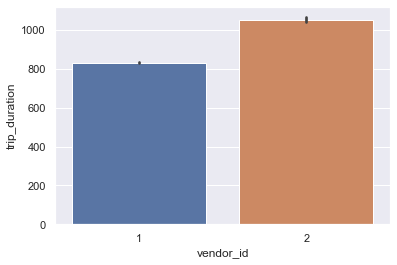

In [72]:
sns.barplot(x='vendor_id', y='trip_duration', data=data)

#### It is obvious that vendor 2 has more trip duration because vendor 2 supplies more taxies in NYC as per our univariate analysis.

#### 2. passenger_count  & trip_duration

<AxesSubplot:xlabel='passenger_count', ylabel='trip_duration'>

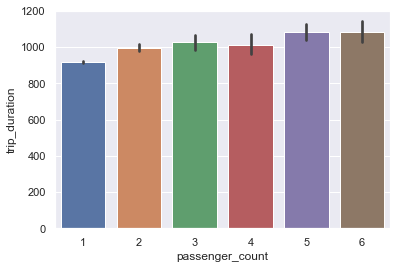

In [73]:
sns.barplot(x='passenger_count',y='trip_duration', data=data)

#### Plot shows that trips with 5/6 passengers have more duration which can be interpreted as family trips to relatively longer distances.

#### 3. store_and_fwd_flag & trip_duration

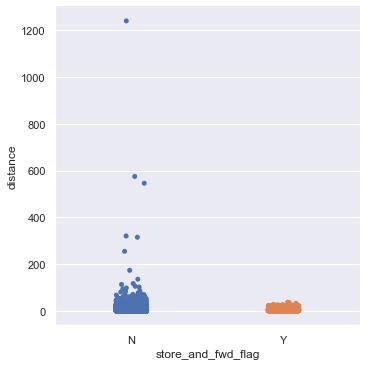

In [88]:
sns.catplot(x='store_and_fwd_flag',y='distance',data=data)

#### It is clear from the plot that the flag is not stored for longer distances.

#### 4. pickup_day & trip_duration

<AxesSubplot:xlabel='pickup_day', ylabel='trip_duration'>

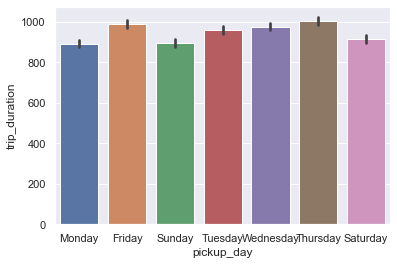

In [81]:
sns.barplot(x="pickup_day", y='trip_duration', data=data)

#### The trip_duration is more on Thursday followed by Friday.

#### 5. pickup_part_of_day & trip_duration

<AxesSubplot:xlabel='pickup_part_of_day', ylabel='trip_duration'>

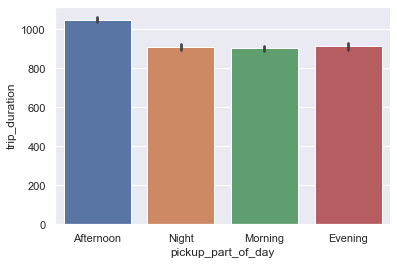

In [82]:
sns.barplot(x="pickup_part_of_day", y='trip_duration', data=data)

#### As we saw in univariate analysis, afternoon time has more trips hence more duration of trips.

#### 6. pickup_hour  &  trip_duration

<AxesSubplot:xlabel='pickup_hour', ylabel='trip_duration'>

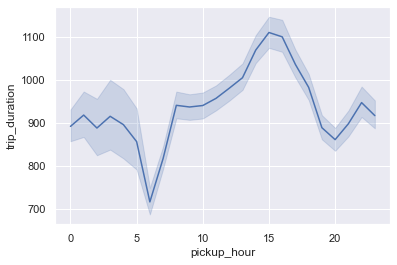

In [85]:
sns.lineplot(x='pickup_hour',y='trip_duration',data=data)

#### It is observed from the graph that the trip duration is more at 3:00pm.

<AxesSubplot:xlabel='pickup_day_no', ylabel='distance'>

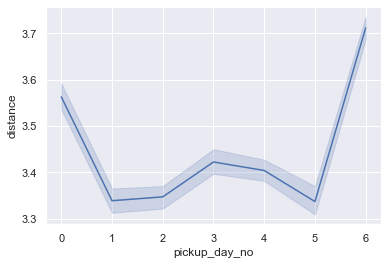

In [91]:
sns.lineplot(x='pickup_day_no',y='distance',data=data)

#### The distance increases steadily from Saturday to Sunday. 

In [92]:
corr=data.corr()

<AxesSubplot:>

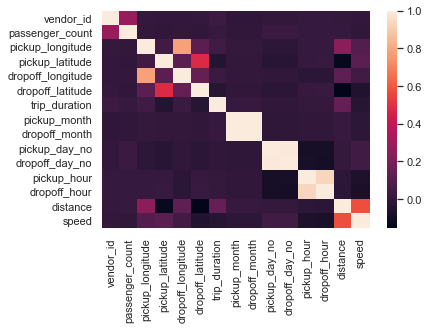

In [93]:
sns.heatmap(corr)

## CONCLUSIONS
#### 1.The target variable doesn't seem to have a high correlation with the other variables.
#### 2. The distance and speed are highly correlated which is obvious.
#### 3. The pickup_hour and dropoff_hour are strongly correlated which is not surprising.
#### 4. The pickup_longitude and dropoff_longitude have a high correlation factor.